### **Supervised**: `Regularization`

**Definition**: Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. In simple terms, it reduces parameters and shrinks (simplifies) the model. This more streamlined, more parsimonious model will likely perform better at predictions. Regularization adds penalties to more complex models and then sorts potential models from least overfit to greatest; The model with the lowest “overfitting” score is usually the best choice for predictive power.

L1 and L2 regularization are two common techniques used to prevent overfitting in linear regression models. They add a penalty term to the linear regression cost function (SSE), which discourageous the model from fitting the training data to closely by adding complexity.

**L1 Regularization**

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, adds a penalty term to the linear regression cost function that is proportional to the absolute values of the regression coefficients. The L1 regularization term encourages sparsity in the model, meaning it tends to force some of the regression coefficients to be exactly zero. This has the effect of feature selection, where some features are effectively excluded from the model.

$$J(m,b) = \sum\limits_{i=1}^n (y_i - (mx_i+b))^2 + \lambda|m|$$

**L2 Regularization**

L2 regularization, also known as Ridge regression, adds a penalty term to the linear regression cost function that is proportional to the square of the regression coefficients. The L2 regularization helps to reduce the magnitude of the coefficients but doesn't force them to be exactly zero. It smooths out the impact of individual features on the model, making the model more robust and less sensitive to outliers.

$$J(m,b) = \sum\limits_{i=1}^n (y_i - (mx_i+b))^2 + \lambda m^2$$

The regularization parameters (lambda or alpha) is used to control the trade-off between fitting the data and preventing overfitting in both L1 and L2 regularization. When increasing $\lambda$:

- Reduce model complexity
- Increase bias in the model
- Making it less sensitive to noise in the training data
- Can indirectly help with multicollinearity

In [1]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
np.random.seed(0)
X = np.random.rand(100,1)
y = 2*X + 1 + np.random.rand(100,1)

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
X_train.shape, X_test.shape

((80, 1), (20, 1))

Create three different regression models: Linear Regression (no regularization), Lasso, and Ridge. Fit these models to the training data.

In [18]:
alphas = np.logspace(-2,0.5,200)

coefs_lasso = []
coefs_ridge = []
coefs_linreg = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    coefs_lasso.append(lasso.coef_[0])

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    coefs_ridge.append(ridge.coef_[0])

    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    coefs_linreg.append(linreg.coef_[0])


y_lasso = lasso.predict(X_test)
y_ridge = ridge.predict(X_test)
y_linreg = linreg.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_lasso)
mse_ridge = mean_squared_error(y_test, y_ridge)
mse_linreg = mean_squared_error(y_test, y_linreg)

Now, let's create a plot to compare the results. First, we will visualize the effects of lambda on each coefficients of the three models.

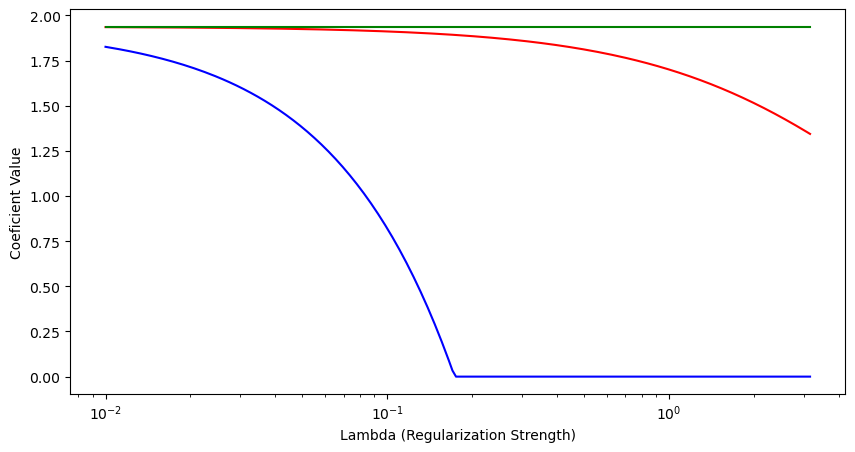

In [21]:
plt.figure(figsize = (10,5))

plt.plot(alphas,coefs_lasso, label='L1 (Lasso)', color='b')
plt.plot(alphas,coefs_ridge, label='L2 (Ridge)', color='r')
plt.plot(alphas,coefs_linreg, label='Linear Regresion', color='g')

plt.xscale('log')

plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Coeficient Value')

plt.show()

Next, we will visualize the original data, and the predictions made by the three models.

### **Regularization in** `Regression Model`

#### **Load Dataset**

Define features and target

Split the dataset into two portions: the training set and the testing set. The training set (seen data) is used to train your machine learning model, while the testing set (unseen data) is used to evaluate its performance.

#### **Ridge Regression**

**Insight**: When alpha is set to a high value, It causes the model to tends to underfitting. because both the mse on the training set and test set are large and will continue to increase as alpha increases. In the graph, the ideal condition is achieved when alpha equals 10, where the gap between MSE on training and testing is small.

**Best Model: alpha = 10**

#### **Lasso Regression**

**Insight**: When alpha is set to a high value, It causes the model to also tends to underfitting, as the mse on the training set and test set are large and will continue to increase as alpha increases until a steady state. In the graph, the ideal condition is achieved when alpha equals 0.1, where the gap between MSE on training and testing is small.

**Best Model: alpha = 0.1**